In [1]:
import sys, os
from pathlib import Path
sys.path.insert(0, str(Path(os.getcwd()).parent)) # add parent directory to path to import python files from there

import gsd_uncertainty
import grainsizing
import plotting
import numpy as np
import matplotlib.pyplot as plt

In [8]:
PATH = "F:/cellpose/fh/"
gsds = grainsizing.load_grain_set([PATH],gsd_str='grain')
num_it  = 100

(0.0, 172.56992293095308)

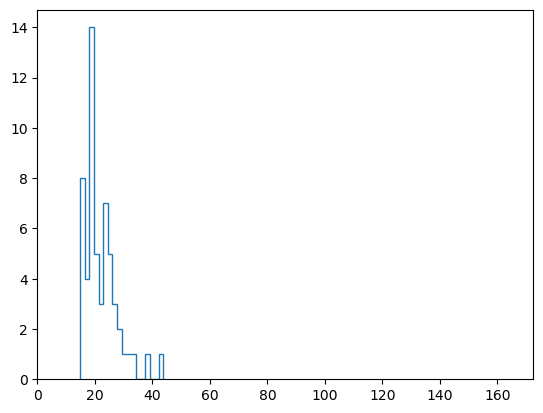

In [10]:
plt.hist(res_df['med'],histtype='step',bins=int(len(res_df)/3),label='med')
plt.xlim(0,np.max(res_df['max']))

## Calculate percentile uncertainties

In [15]:
res_dict_bs = gsd_uncertainty.dataset_uncertainty(gsds,num_it=num_it,mute=True)

bootstrapping:   0%|          | 0/53 [00:00<?, ?gsd/s]


FileNotFoundError: [Errno 2] No such file or directory: 'F'

In [ ]:
res_dict_mc = gsd_uncertainty.dataset_uncertainty(gsds,method='MC',scale_err=[.1],length_err=[1],num_it=num_it,mute=True)

MC: 100%|██████████| 7/7 [00:30<00:00,  4.31s/gsd]


In [ ]:
sfm_error_l = gsd_uncertainty.compile_sfm_error(from_file=PATH+'OM_err.csv')

In [ ]:
res_dict_om = gsd_uncertainty.dataset_uncertainty(gsds,method='MC_SfM',sfm_error=sfm_error_l,sfm_type='OM',num_it=num_it,mute=True)

MC_SfM: 100%|██████████| 7/7 [01:19<00:00, 11.43s/gsd]


In [ ]:
res_dict_si = gsd_uncertainty.dataset_uncertainty(gsds,method='MC_SfM',sfm_error=sfm_error_l,num_it=num_it,mute=True)

MC_SfM: 100%|██████████| 7/7 [00:37<00:00,  5.38s/gsd]


### Compare uncertainty methods

In [ ]:
mcs,ids = gsd_uncertainty.read_set_unc(PATH)
elem={
        'CI_bounds':'','median':'',
        'colors':[plt.cm.get_cmap('tab20')(i) for i in range(len(mcs))]
}

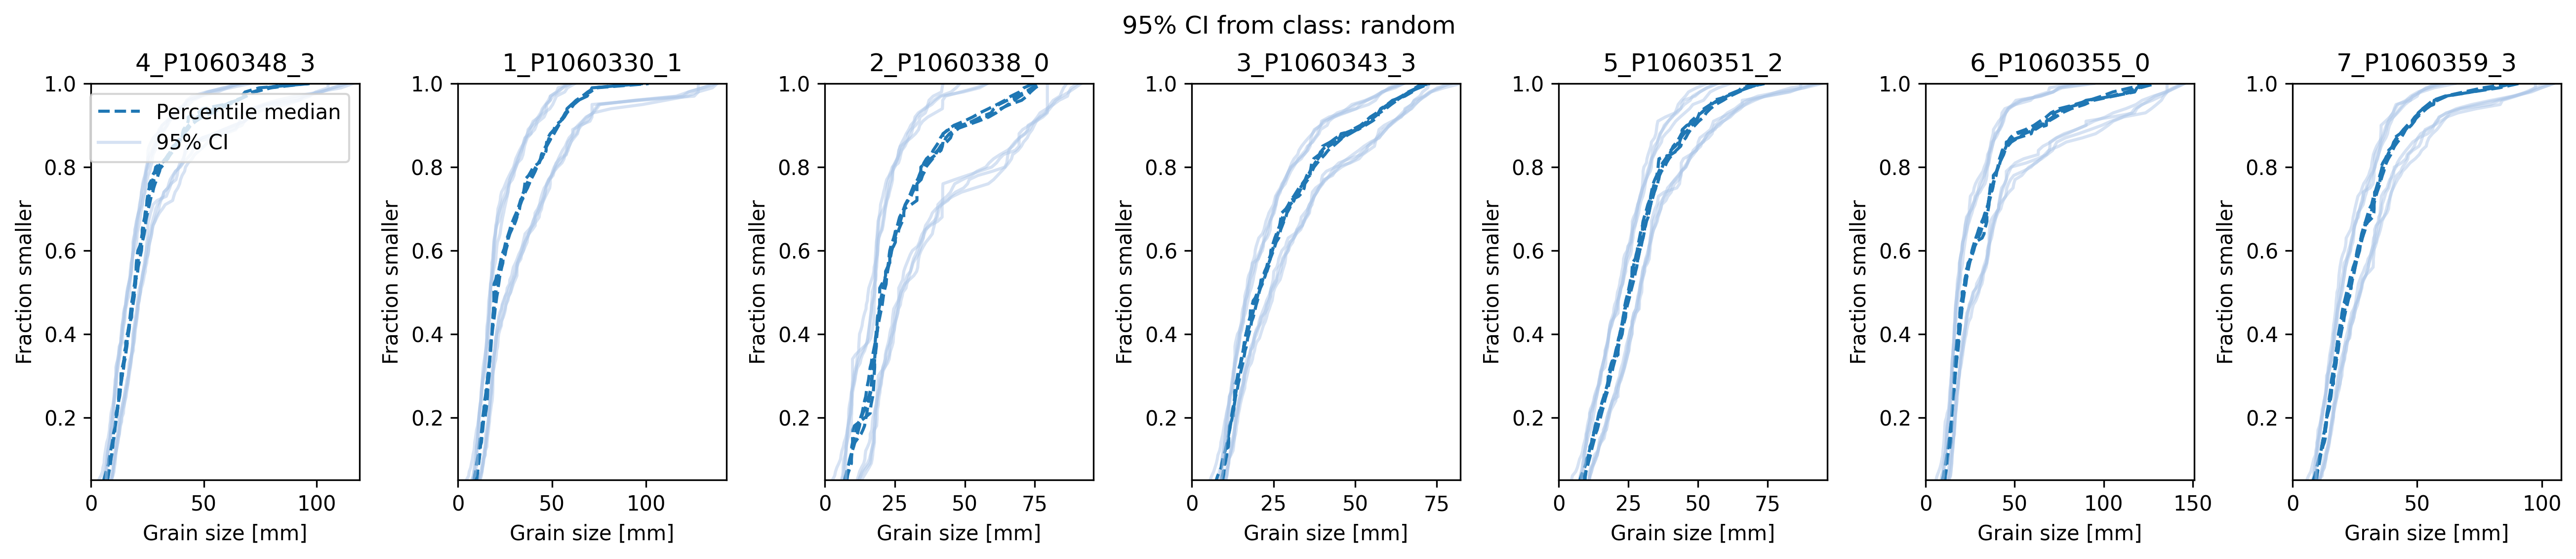

In [ ]:
fig = plt.figure(figsize=(len(ids)*2.5,10), dpi=300)
for j in range(len(ids)):
    for i in range(len(mcs)):
        if ids[j] in mcs[i]:
            df = gsd_uncertainty.read_unc(mcs[i])
            plt.subplot(3,len(ids),j+1)
            plotting.uncertainty.plot_gsd(df,elem=elem)
            plt.title(ids[j])
            if i == 0:
                plt.legend()
    plt.xlabel('Grain size [mm]'), plt.ylabel('Fraction smaller')
plt.suptitle('95% CI from class: random')
plt.tight_layout()

### Compare images

In [ ]:
elem={
        'CI_area':'','input':'',
        'colors':[plt.cm.get_cmap('tab20')(i) for i in range(len(mcs))]
}

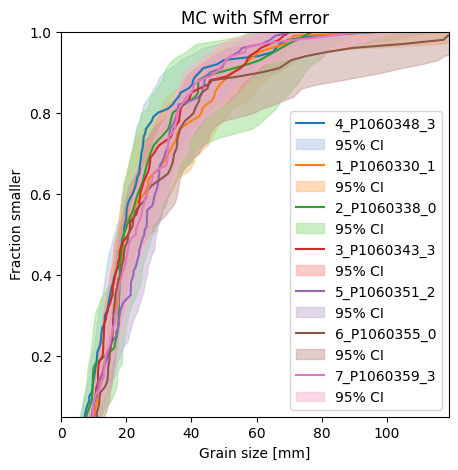

In [ ]:
plt.figure(figsize=(5,5))
cix=0
for j in range(len(ids)):
    for i in range(len(mcs)):
        if ids[j] in mcs[i]:
            if 'SfM' in mcs[i]:
                df = gsd_uncertainty.read_unc(mcs[i])
                plotting.uncertainty.plot_gsd(df,elem=elem,data_ID=ids[j],cix=cix)
    cix+=2
plt.title('MC with SfM error')
plt.xlabel('Grain size [mm]'), plt.ylabel('Fraction smaller')
plt.legend();